# 0. Make all imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# 1. Analyzing train.csv file

## 1.1. Data Understanding
- Data shape
- Head and tail
- Dtypes
- Columns
- Describe

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [4]:
train.shape

(8693, 14)

In [5]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [6]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

## 1.2. Data Preparation
- Dropping irrelevant columns and rows
- Identifying duplicate columns
- Renaming columns
- Feature creation
- Identifying missing values --> df.isna().sum()

Notes: it is a good practice to:
- Change to datetime the columns that are actually dates --> pd.to_datetime(df)
- Change to numeric the columns that are actually numbers --> pd.to_numeric(df)
- Rename some column names in order to standardize the names --> df.rename({'old_name': 'new_name'})

In [13]:
null_values = train.isna().sum() / len(train)
null_values

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [15]:
# As the null value percentage is low (approx. 2%), we can proceed on droping null values
train = train.dropna(axis=0)
train.shape

(6606, 14)

A good idea would have been to check how many rows we might loose, but in this case, we can check the null again

In [18]:
train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [8]:
train.duplicated()[:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [9]:
train.loc[train.duplicated(subset=['PassengerId'])]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


Duplicated: I'm going to considerate that there is no duplicated values in the train dataset.

In [10]:
train.query('PassengerId == "9278_01"') # It is possible to query a value to check it where it is

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False


Note: a good source to understand more about EDA could be https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14

## 1.3. Feature Understanding
- Plotting Feature Distribution
    - Histogram
    - KDE
    - Boxplot

In [63]:
# Is the data frame balanced? Check the target value counts
TARGET = 'Transported'
train[TARGET].value_counts() # --> the target is balanced

True     3327
False    3279
Name: Transported, dtype: int64

In [64]:
train['HomePlanet'].value_counts()

Earth     3566
Europa    1673
Mars      1367
Name: HomePlanet, dtype: int64

In [65]:
numeric = train.describe().columns

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
pd.pivot_table(data=train, index=TARGET, columns=['Age']).T


Transported      False    True
          Age                 
FoodCourt 0.0      0.0     0.0
          1.0      0.0     0.0
          2.0      0.0     0.0
          3.0      0.0     0.0
          4.0      0.0     0.0
...                ...     ...
VRDeck    75.0   132.0     0.0
          76.0   330.0     0.0
          77.0     NaN  1464.0
          78.0     2.0     0.0
          79.0  1088.5     NaN

[400 rows x 2 columns]

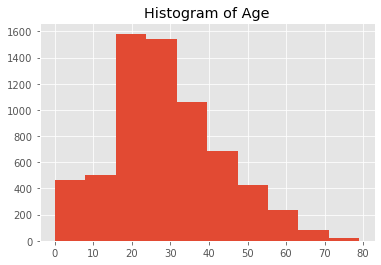

In [ ]:
plt.hist(x=train.Age)
plt.title('Histogram of Age')
plt.show()

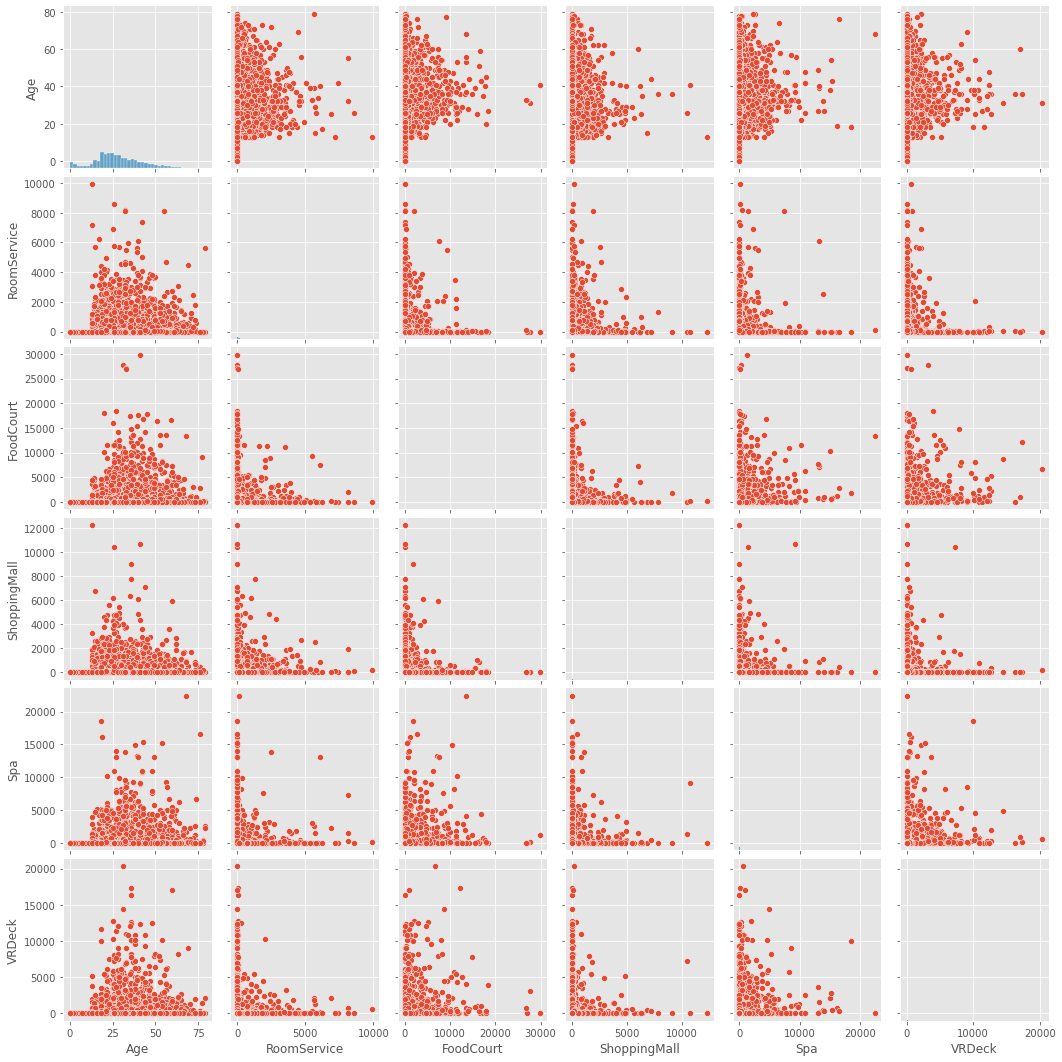

In [50]:
sns.pairplot(data=train[numeric])